<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#下载并查看数据集" data-toc-modified-id="下载并查看数据集-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>下载并查看数据集</a></span><ul class="toc-item"><li><span><a href="#数据清洗" data-toc-modified-id="数据清洗-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>数据清洗</a></span></li></ul></li><li><span><a href="#创建网络" data-toc-modified-id="创建网络-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>创建网络</a></span></li><li><span><a href="#训练与测试" data-toc-modified-id="训练与测试-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>训练与测试</a></span></li></ul></div>

In [1]:
import tensorflow as tf 
import numpy as np 
from tensorflow import keras
import pandas as pd 

# 下载并查看数据集

In [2]:
# 在线下载汽车效能数据集
dataset_path = keras.utils.get_file("auto-mpg.data","http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [3]:
# 利用 pandas 读取数据集，字段有效能（公里数每加仑），气缸数，排量，马力，重量
# 加速度，型号年份，产地
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,na_values = "?", comment='\t',sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()
# 查看部分数据
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


## 数据清洗

In [4]:
print(dataset.isna().sum(), end="\n\n")
dataset = dataset.dropna()
print(dataset.isna().sum())

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


In [5]:
# 处理类别型数据，其中 origin 列代表了类别 1,2,3,分布代表产地：美国、欧洲、日本
# 先弹出(删除并返回)origin 这一列
origin = dataset.pop('Origin')
# 根据 origin 列来写入新的 3 个列
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail() # 查看新表格的后几项

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [6]:
# 切分为训练集和测试集
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [7]:
# 移动 MPG 油耗效能这一列为真实标签 Y
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [8]:
# 查看训练集的输入 X 的统计数据
train_stats = train_dataset.describe()
print(train_stats)
# train_stats.pop("MPG") # 仅保留输入 X
train_stats = train_stats.transpose() # 转置

        Cylinders  Displacement  Horsepower       Weight  Acceleration  \
count  314.000000    314.000000  314.000000   314.000000    314.000000   
mean     5.477707    195.318471  104.869427  2990.251592     15.559236   
std      1.699788    104.331589   38.096214   843.898596      2.789230   
min      3.000000     68.000000   46.000000  1649.000000      8.000000   
25%      4.000000    105.500000   76.250000  2256.500000     13.800000   
50%      4.000000    151.000000   94.500000  2822.500000     15.500000   
75%      8.000000    265.750000  128.000000  3608.000000     17.200000   
max      8.000000    455.000000  225.000000  5140.000000     24.800000   

       Model Year         USA      Europe       Japan  
count  314.000000  314.000000  314.000000  314.000000  
mean    75.898089    0.624204    0.178344    0.197452  
std      3.675642    0.485101    0.383413    0.398712  
min     70.000000    0.000000    0.000000    0.000000  
25%     73.000000    0.000000    0.000000    0.000000

In [9]:
# 标准化数据
def norm(x): # 减去每个字段的均值，并除以标准差
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset) # 标准化训练集
normed_test_data = norm(test_dataset) # 标准化测试集

In [10]:
print(normed_train_data.shape,train_labels.shape)
print(normed_test_data.shape, test_labels.shape)

(314, 9) (314,)
(78, 9) (78,)


In [11]:
train_db = tf.data.Dataset.from_tensor_slices((normed_train_data.values,
train_labels.values)) # 构建 Dataset 对象
train_db = train_db.shuffle(100).batch(32) # 随机打散，批量化

# 创建网络

In [12]:
from tensorflow.keras import layers
from tensorflow.keras import losses

In [13]:
class Network(keras.Model):
    # 回归模型
    def __init__(self):
        super(Network, self).__init__()
        # 创建三个全连接层
        self.fc1 = layers.Dense(64, activation=tf.nn.relu)
        self.fc2 = layers.Dense(64, activation=tf.nn.relu)
        self.fc3 = layers.Dense(1, activation=None)
        
    def call(self, inputs, training=None, mask=None):
        x = self.fc1(inputs)
        x = self.fc2(x)
        x = self.fc3(x)
        
        return x

# 训练与测试

In [14]:
model = Network() # 创建网络类实例
# 通过 build 函数完成内部张量的创建，其中 4 为任意设置的 batch 数量， 9 为输入特征长度
model.build(input_shape=(4, 9))
model.summary() # 打印网络信息
optimizer = tf.keras.optimizers.RMSprop(0.001) # 创建优化器，指定学习率

Model: "network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  640       
_________________________________________________________________
dense_1 (Dense)              multiple                  4160      
_________________________________________________________________
dense_2 (Dense)              multiple                  65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [15]:
_losses = []
for epoch in range(200): # 200 个 Epoch
    for step, (x,y) in enumerate(train_db): # 遍历一次训练集
        # 梯度记录器，训练时需要使用它
        with tf.GradientTape() as tape:
            out = model(x) # 通过网络获得输出
            loss = tf.reduce_mean(losses.MSE(y, out)) # 计算 MSE
            mae_loss = tf.reduce_mean(losses.MAE(y, out)) # 计算 MAE
        if step % 20 == 0: # 间隔性地打印训练误差
            print(epoch, step, float(loss))
            _losses.append(loss)
        
        # 计算梯度，并更新
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

0 0 610.9495239257812
1 0 498.43524169921875
2 0 543.5953369140625
3 0 488.963623046875
4 0 408.51702880859375
5 0 403.8531494140625
6 0 277.11199951171875
7 0 214.205322265625
8 0 125.31616973876953
9 0 130.34776306152344
10 0 127.70245361328125
11 0 110.18977355957031
12 0 108.73026275634766
13 0 92.50582122802734
14 0 87.18468475341797
15 0 87.21477508544922
16 0 66.2413330078125
17 0 44.717796325683594
18 0 54.282901763916016
19 0 59.547569274902344
20 0 59.74663543701172
21 0 69.79057312011719
22 0

In [16]:
import matplotlib.pyplot as plt 
%matplotlib inline

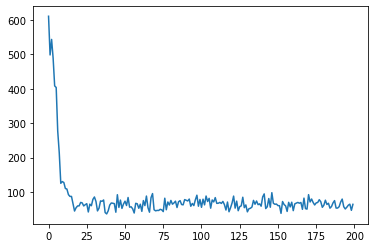

In [17]:
plt.plot(_losses)